[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


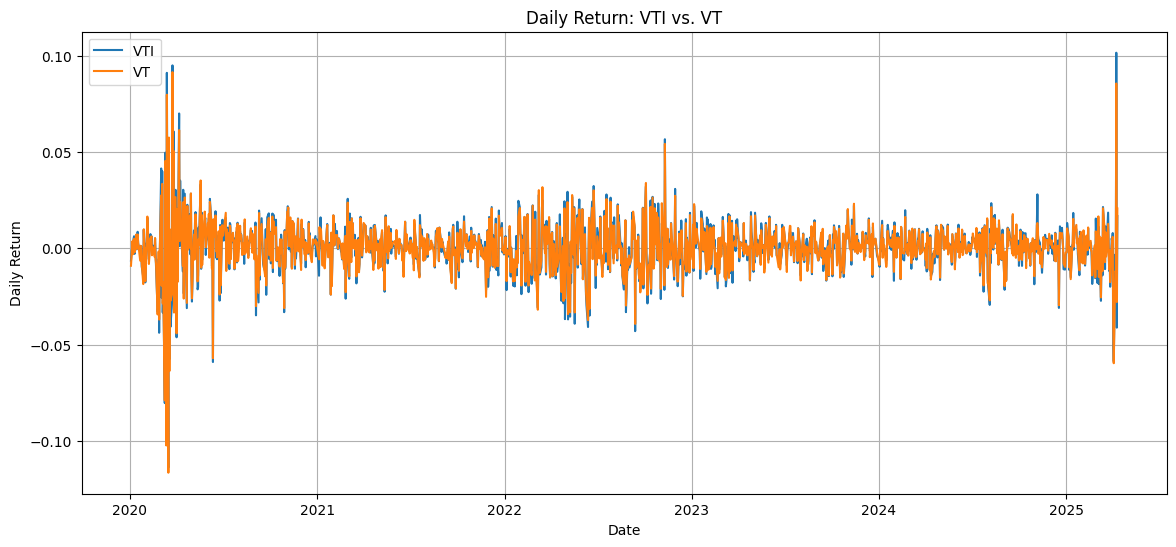

📅 日報酬率震盪最大 Top 10 日期：

           Main Ticker VTI Return (%) VT Return (%) Max Abs Return (%)
Date                                                                  
2020-03-16          VT        -11.38%       -11.64%             11.64%
2020-03-12          VT         -9.72%       -10.23%             10.23%
2025-04-09         VTI         10.15%         8.55%             10.15%
2020-03-24         VTI          9.49%         9.14%              9.49%
2020-03-13         VTI           9.1%         7.96%               9.1%
2020-03-09         VTI         -8.03%        -7.89%              8.03%
2020-04-06         VTI          6.99%         6.13%              6.99%
2020-03-18          VT         -5.76%        -6.37%              6.37%
2020-03-26         VTI          6.07%         5.06%              6.07%
2025-04-04          VT         -5.87%        -5.96%              5.96%

📊 追蹤誤差的標準差（Tracking Error Std）: 0.002766


In [11]:
# 安裝 yfinance（如果還沒安裝）
!pip install yfinance

# 匯入套件
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 下載資料（VTI & VT，從 2020 到現在）
vti = yf.download("VTI", start="2020-01-01", end="2025-04-14")
vt = yf.download("VT", start="2020-01-01", end="2025-04-14")

# 計算日報酬率
vti['Daily Return'] = vti['Close'].pct_change()
vt['Daily Return'] = vt['Close'].pct_change()

# 畫出報酬率折線圖
plt.figure(figsize=(14, 6))
plt.plot(vti['Daily Return'], label='VTI')
plt.plot(vt['Daily Return'], label='VT')
plt.title("Daily Return: VTI vs. VT")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()

# 合併兩者報酬率
returns_df = pd.DataFrame({
    'VTI': vti['Daily Return'],
    'VT': vt['Daily Return']
})

# 計算每一天哪支 ETF 波動較大（取絕對值）
abs_return = returns_df.abs()
top_spikes = abs_return.max(axis=1).sort_values(ascending=False).head(10)

# 建立 DataFrame，顯示是哪一支震盪最大 & 原始報酬率
top_df = pd.DataFrame(index=top_spikes.index)
top_df['Max Abs Return'] = top_spikes
top_df['VTI Return'] = returns_df['VTI'].loc[top_spikes.index]
top_df['VT Return'] = returns_df['VT'].loc[top_spikes.index]

# 補上誰是震盪來源
top_df['Main Ticker'] = top_df.apply(lambda row: 'VTI' if abs(row['VTI Return']) >= abs(row['VT Return']) else 'VT', axis=1)

# 格式化為百分比字串
top_df['VTI Return (%)'] = (top_df['VTI Return'] * 100).round(2).astype(str) + '%'
top_df['VT Return (%)'] = (top_df['VT Return'] * 100).round(2).astype(str) + '%'
top_df['Max Abs Return (%)'] = (top_df['Max Abs Return'] * 100).round(2).astype(str) + '%'

# 顯示結果
print("📅 日報酬率震盪最大 Top 10 日期：\n")
print(top_df[['Main Ticker', 'VTI Return (%)', 'VT Return (%)', 'Max Abs Return (%)']])

# 計算 Tracking Error（VTI - VT）的標準差
tracking_error = returns_df['VTI'] - returns_df['VT']
tracking_error_std = tracking_error.std()

print(f"\n📊 追蹤誤差的標準差（Tracking Error Std）: {tracking_error_std:.6f}")




